# Prediction using Supervised ML

# ---------------------------------------------------------------------------------------------------------------

## Task: 

## Predict the percentage of an student based on the no. of study hours.
## What will be predicted score if a student studies for 9.25 hrs/ day?

###  Dataset used : http://bit.ly/w-data

##### Task completed during Data Science and Business Analytics Internship @ The SPARKS FOUNDATION (GRIP)

##### Submitted by : Adwait Avinash Joshi

# ---------------------------------------------------------------------------------------------------------------

In [2]:
# Import the Libraries

import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
# Load the data set

data = pd.read_csv('student_scores - student_scores.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Bivariate Analysis:

This will determine relationship between independent variable (Hours) and dependent variable (Scores)

<AxesSubplot:>

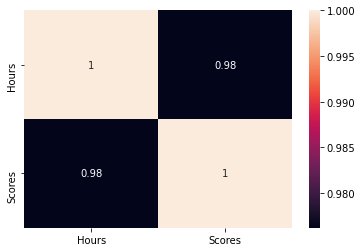

In [4]:
# Plot the heatmap

sns.heatmap(data.corr(),annot=True)

##### From the correlation values we can infer that there is strong postive relation between Independent variable (Hours) and dependent varibale (Scores)

### We will use Ordinary Least Square Method (OLS) Method for the prediction

##### Prepare the data

We will split the data set into train and test

In [5]:
x = data['Hours']
y=data['Scores']

In [6]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.8)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20,)
(5,)
(20,)
(5,)


In [8]:
#### Fit the OLS model on train data

In [9]:
lm = sm.OLS(y_train,x_train).fit()

In [10]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Scores   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              1858.
Date:                Sat, 12 Jun 2021   Prob (F-statistic):                    2.03e-20
Time:                        12:29:59   Log-Likelihood:                         -62.760
No. Observations:                  20   AIC:                                      127.5
Df Residuals:                      19   BIC:                                      128.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Hours         10.0757      0.234     43.110      0.000       9.587      10.565
==============================================================================
Omnibus:                        3.707   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.157   Jarque-Bera (JB):                1.583
Skew:                          -0.306   Prob(JB):                        0.453
Kurtosis:                       1.765   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Here we are getting 'R-squared' value as 0.992 which is very good

### Lets predict the values for x_test and Compare the result with y_test(actual)

In [11]:
y_pred = lm.predict(x_test)

In [12]:
result = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
result

,Predicted,Actual
22,38.287615,35
5,15.113532,20
15,89.673624,95
10,77.582798,85
1,51.386009,47


<AxesSubplot:xlabel='Predicted'>

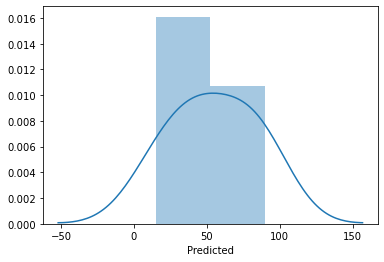

In [16]:
sns.distplot(result['Predicted'])

<AxesSubplot:xlabel='Actual'>

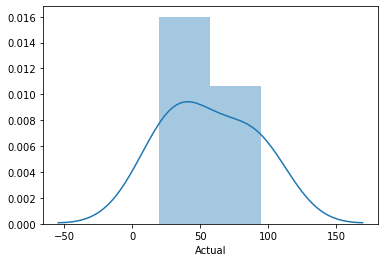

In [17]:
sns.distplot(result['Actual'])

### Now check the model with the data provided in the question

In [13]:
y_predict = lm.predict(9.25)
y_predict

array([93.20011503])

In [14]:
print("Result : ")
print("---------------------------")
print("Hours: ",9.25)
print("Scores: ",y_predict[0])

Result : 
---------------------------
Hours:  9.25
Scores:  93.20011503259256
